In [ ]:
#%%

#import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#%%

# Load data
df = pd.read_csv('dataset_buys _comp.csv')

# Lihat beberapa data teratas
print(df.head())

# Cek tipe data
print(df.dtypes)

          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1
Age              object
Income           object
Student          object
Credit_Rating    object
Buys_Computer     int64
dtype: object


In [ ]:
#%%

# Pre-processing (encoding)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category').cat.codes

# Tampilkan hasil encoding
print(df.head())

   Age  Income  Student  Credit_Rating  Buys_Computer
0    2       2        1              1              0
1    1       2        1              0              1
2    1       0        0              1              1
3    2       0        0              0              1
4    2       0        1              0              1


In [ ]:
#%%

# Split data menjadi data latih dan uji
X = df.iloc[:, :-1]  # semua kolom kecuali yang terakhir
y = df.iloc[:, -1]   # kolom target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#%%

# Melatih model
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#%%

# Evaluasi
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 57  14]
 [ 25 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200


Accuracy Score: 0.805


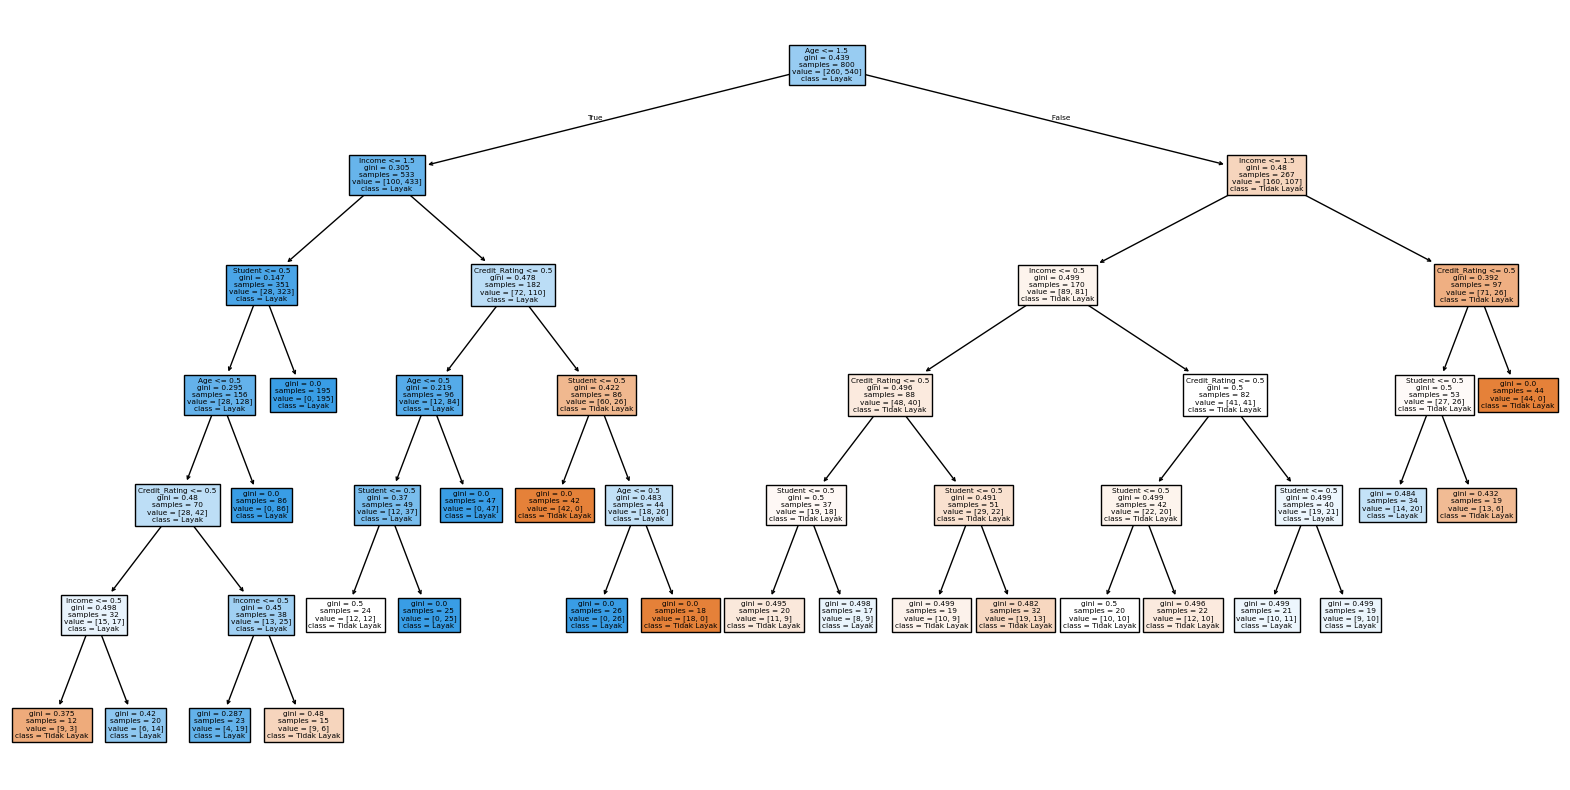

In [ ]:
#%%

#Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Tidak Layak", "Layak"], filled=True)
plt.show()